In [98]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 20
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/Users/adnan/Documents/datasets/brain_tumor_classification/Training/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 5155 files belonging to 4 classes.


In [99]:
class_names = train_ds.class_names
print(class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


2024-06-02 15:08:04.239713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


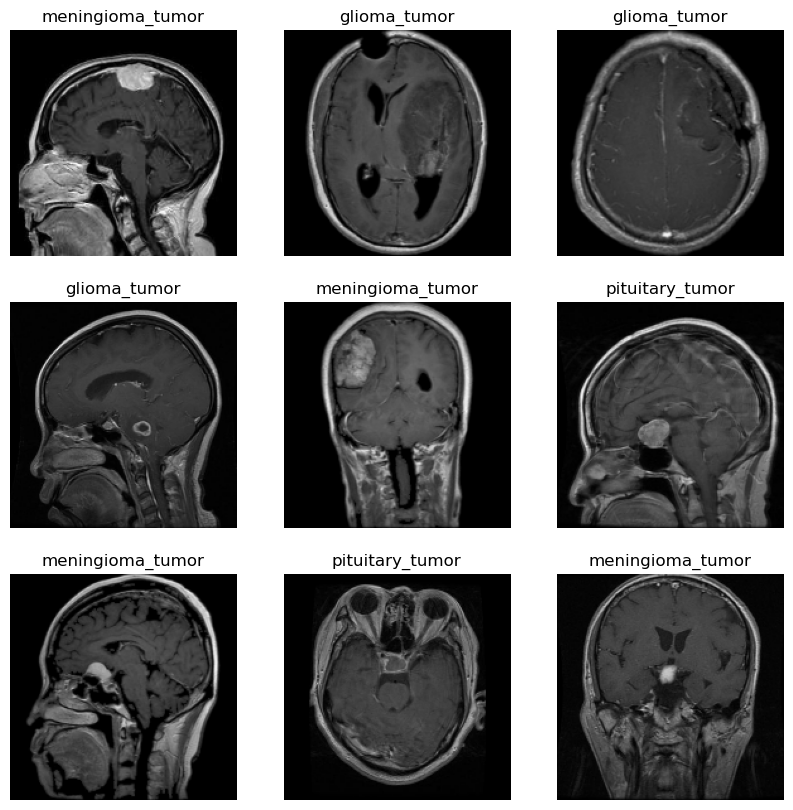

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [101]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/Users/adnan/Documents/datasets/brain_tumor_classification/Validation/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1205 files belonging to 4 classes.


In [102]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [103]:
num_classes = len(class_names)
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Resizing(img_height,img_width,)
  ]
)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [104]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [105]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 111ms/step - accuracy: 0.4230 - loss: 1.2321 - val_accuracy: 0.4647 - val_loss: 1.4176
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - accuracy: 0.6479 - loss: 0.8567 - val_accuracy: 0.5145 - val_loss: 1.2058
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - accuracy: 0.7063 - loss: 0.6877 - val_accuracy: 0.6373 - val_loss: 0.9951
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.7535 - loss: 0.6292 - val_accuracy: 0.6373 - val_loss: 1.0609
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.7963 - loss: 0.5322 - val_accuracy: 0.6548 - val_loss: 1.0236
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.8117 - loss: 0.4939 - val_accuracy: 0.6664 - val_loss: 1.0676
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.8501 - loss: 0.4062 - val_accuracy: 0.7203 - val_loss: 0.8345
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 27s 105ms/step - accuracy: 0.8626 - loss: 0

In [ ]:
plt.plot(training_history.history['accuracy'], label='train accuracy')
plt.plot(training_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf

# Define the local path to the image and the target size
local_image_path = '/Users/adnan/Desktop/acth.jpg'

# Load the image from the local path
img = load_img(local_image_path, target_size=(img_height, img_width))

# Convert the image to an array
img_array = img_to_array(img)

# Expand the dimensions to create a batch
img_array = np.expand_dims(img_array, axis=0)

# Make predictions using the model
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Print the result with the most likely class and confidence
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)